<a href="https://colab.research.google.com/github/Erifai/Bi_Project/blob/main/reduction_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install rpy2
#!pip install hdbscan

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [5]:
X = pd.read_excel("/content/dietary_survey_IBS_42.xlsx")
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,22.204563,26.655304,15.989490,5.849367,0.929968,66.241185,-2.735761,20.724598,6.484320,19.210565,5.049086,14.951061,6.122586,11.463460,-2.687794,7.054673,4.235265,0.839753,41.500297,6.909797,1.633025,-0.552138,2.572284,2.386443,1.908757,-1.453030,10.882347,9.157404,5.845275,1.863454,9.041778,1.677664,9.440442,4.159233,8.483641,-0.010671,6.328142,4.358306,5.718117,4.214223,23.359110,19.061011
1,52.547329,46.277061,21.131506,14.636202,-1.144374,65.649463,36.041828,11.056420,5.356049,18.010135,-3.496564,14.220131,14.394248,10.677281,5.388775,5.863542,7.604121,2.718896,9.373348,12.421257,16.051860,12.146961,8.352107,-0.591898,19.544320,13.545684,18.396438,12.230256,3.174840,1.598831,3.631816,10.162022,6.213195,9.720099,10.770151,10.585450,7.969777,-0.149120,2.994223,2.184413,6.918144,5.796814
2,14.369772,44.708438,5.486241,9.993163,6.773212,14.713838,-6.076168,7.794958,2.339704,11.423572,25.716985,3.894881,9.000055,7.063448,8.751053,8.937750,3.983618,3.294363,-1.679362,8.220496,14.580153,-4.304972,4.704147,5.174713,6.992720,-2.584275,16.280947,-3.956996,5.048465,2.794630,-8.067248,5.990827,11.953008,1.112942,3.004165,10.157514,5.298184,3.165800,4.861562,1.403917,-2.589836,51.885415
3,105.421216,15.302041,6.814486,10.059338,3.946869,42.497711,-8.853831,4.368930,6.479576,26.383207,16.640787,-9.533368,17.338856,6.784303,-0.594914,1.841925,9.589967,7.595559,38.493166,16.435779,-0.014947,-1.355766,8.770372,2.569498,23.111712,17.395060,9.099817,3.429923,5.440719,2.508535,15.520612,11.366135,0.271508,-0.317837,6.176477,11.091717,9.704125,-0.486921,1.155338,3.116459,44.720107,20.523801
4,58.010786,-14.669197,6.655731,6.823591,2.297421,38.866803,22.386713,5.718093,4.708961,10.222167,11.897280,4.876392,11.765393,14.621550,8.554766,-0.858152,11.861209,5.635115,28.550844,6.079985,-5.163850,8.749098,2.712111,5.083867,8.101268,16.960749,3.560615,7.022158,1.217705,1.395350,12.994296,9.953474,-0.439893,11.356802,3.825484,4.524970,5.891424,4.710390,3.107612,1.642572,-3.833479,40.963779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,28.578054,4.417354,-4.050783,0.000000,1.591444,13.608173,8.026680,0.000000,0.000000,3.794772,3.527874,1.139805,0.000000,1.269722,0.000000,6.395732,0.000000,0.000000,8.894308,1.557193,3.177011,2.786305,0.953077,-0.050027,0.000000,-0.922207,-1.729788,0.000000,0.000000,6.120676,-3.039925,0.861787,0.000000,3.919229,0.606874,1.808100,-0.438713,1.027254,2.044562,0.000000,2.881654,2.032823
396,11.332919,-0.432281,13.203815,0.000000,-0.490616,30.544400,7.311818,0.000000,0.000000,2.106203,8.687723,0.774225,0.000000,2.133594,0.000000,1.790438,0.000000,0.000000,2.240976,2.371984,-0.136751,4.417165,0.776345,1.964268,0.000000,0.869157,4.842423,0.000000,0.000000,3.212070,5.421959,0.393818,0.000000,3.256174,1.760225,-0.092560,1.074621,-0.557721,2.543718,0.000000,3.050854,0.464833
397,6.117714,7.282969,6.540861,0.000000,0.708020,3.742167,8.791746,0.000000,0.000000,4.025488,7.118243,2.512135,0.000000,0.933743,0.000000,2.831721,0.000000,0.000000,-4.219444,3.327994,1.993016,1.987550,0.840832,0.849110,0.000000,1.917079,6.645091,0.000000,0.000000,2.755588,1.007453,1.048939,0.000000,9.032223,0.946592,-0.132438,0.598096,3.498539,2.219925,0.000000,5.079974,1.604133
398,5.088193,4.004795,-3.465638,0.000000,0.854979,30.241124,5.811422,0.000000,0.000000,3.472129,-1.549911,2.539794,0.000000,1.988307,0.000000,2.476293,0.000000,0.000000,16.922976,0.495999,1.035645,2.670729,0.787301,1.912374,0.000000,0.917394,4.309474,0.000000,0.000000,-1.072882,0.261161,0.161729,0.000000,5.421207,5.411648,0.637305,0.537783,1.940877,3.428913,0.000000,2.486929,3.181502


In [6]:
Y = pd.read_excel("/content/dietary_survey_IBS_True.xlsx")

In [10]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   True    400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [11]:
Y.value_counts()

True
2       200
1       200
dtype: int64

## PCA & Kmeans

In [15]:
n_components = 2
k = 2
X_reduced = PCA(n_components=n_components,whiten=False,random_state=42).fit_transform(X)
pred_labels = KMeans(k,random_state=42).fit(X_reduced).labels_


eval_clustering_2D(X_reduced,pred_labels,Y)

In [29]:
Y['True']

0      2
1      2
2      2
3      2
4      2
      ..
395    1
396    1
397    1
398    1
399    1
Name: True, Length: 400, dtype: int64

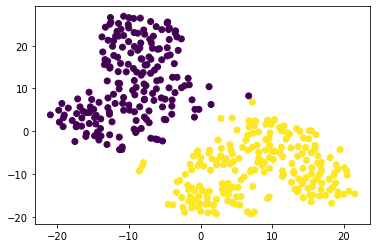

In [33]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=pred_labels)

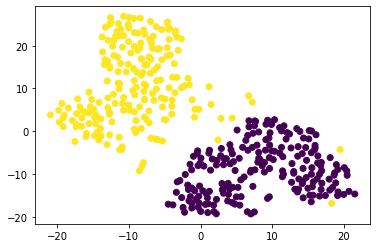

In [36]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y['True'])

In [34]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(pred_labels,Y['True'])

0.8667895469392346

## TSNE & Kmeans

In [39]:
X_reduced = TSNE(n_components=n_components,random_state=42).fit_transform(X)
pred_labels = KMeans(k,random_state=42).fit(X_reduced).labels_


#eval_clustering_2D(X_reduced,pred_labels,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


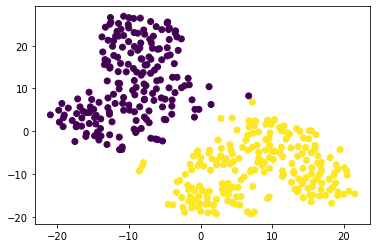

In [40]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=pred_labels)

In [41]:
normalized_mutual_info_score(pred_labels,Y['True'])

0.8667895469392346

In [44]:
!pip install umap-learn
from umap import UMAP

In [45]:
X_reduced = UMAP(n_components=n_components,random_state=42).fit_transform(X)
pred_labels = KMeans(k,random_state=42).fit(X_reduced).labels_

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


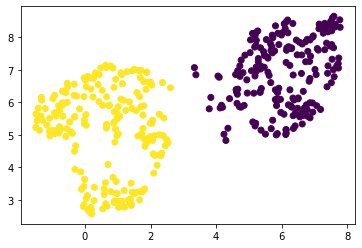

In [46]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=pred_labels)

In [47]:
normalized_mutual_info_score(pred_labels,Y['True'])

0.9154250226934265

## Reduced KM

In [48]:
rkm = fcps.TandemClustering(X,k,Type='Reduced',PlotIt=False,ndim=n_components,nstart=10)
pred_labels = rkm[0]
X_reduced[1][0]

NameError: ignored